<a href="https://colab.research.google.com/github/Kiogora/OpenHAPv2/blob/main/software/particulateSensorNormalization/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update libraries 

In [1]:
!pip install --upgrade plotly

     |████████████████████████████████| 20.6MB 79.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Import required libraries

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import numpy as np;
import plotly.express as px;
import pandas as pd;
import matplotlib.pyplot as plt;
import statsmodels.api as sm;

# Define data fields as used in data capture

In [3]:
command_sent_time_txt = "Command sent time(UTC)"
measurement_received_time_txt = "Measurement received time (UTC)"
device_field_txt = "Device"
device_time_field_txt = "Device time (UTC)"
measurement_field_txt = "Particulate measurement"
connected_openhap_units_field_txt = "Connected OpenHAP units"

# Read the input data capture file

In [4]:
base_url= "https://github.com/Kiogora/OpenHAPv2/raw/main/software/particulateSensorNormalization/data"

target_100ug_df=pd.read_csv(f'{base_url}/target_100ug.csv')
target_500ug_df=pd.read_csv(f'{base_url}/target_500ug.csv')
target_800ug_df=pd.read_csv(f'{base_url}/target_800ug.csv')

# Display settings

Limit columns displayed for PDF conversion or static viewers.

In [5]:
pd.set_option('display.max_columns', 10)

Adjust the DPI below to obtain clearer images. Set this way to avoid browser timeouts on viewing the file on github.

In [6]:
plt.rcParams["figure.dpi"] = 40

# Show sample data from various measurement phases

In [7]:
target_100ug_df.head()

,Command sent time(UTC),Measurement received time (UTC),Device,Device time (UTC),Particulate measurement,Connected OpenHAP units
0,2021-06-24 12:36:47,2021-06-24 12:36:52,40:f5:20:5b:21:d0,2021-06-24 12:36:46,5.15,19
1,2021-06-24 12:36:47,2021-06-24 12:36:52,40:f5:20:5b:21:c8,2021-06-24 12:36:46,5.30,19
2,2021-06-24 12:36:47,2021-06-24 12:36:52,40:f5:20:5b:20:dc,2021-06-24 12:36:46,5.60,19
3,2021-06-24 12:36:47,2021-06-24 12:36:52,40:f5:20:5b:21:74,2021-06-24 12:36:46,5.50,19
4,2021-06-24 12:36:47,2021-06-24 12:36:52,40:f5:20:5b:20:e4,2021-06-24 12:36:47,5.95,19


In [8]:
target_500ug_df.head()

,Command sent time(UTC),Measurement received time (UTC),Device,Device time (UTC),Particulate measurement,Connected OpenHAP units
0,2021-06-24 14:15:05,2021-06-24 14:15:09,40:f5:20:5b:20:c0,2021-06-24 14:15:04,6.55,21
1,2021-06-24 14:15:05,2021-06-24 14:15:09,40:f5:20:5b:20:ec,2021-06-24 14:15:04,8.05,21
2,2021-06-24 14:15:05,2021-06-24 14:15:09,40:f5:20:5b:21:94,2021-06-24 14:15:04,7.85,21
3,2021-06-24 14:15:05,2021-06-24 14:15:09,40:f5:20:5b:21:8c,2021-06-24 14:15:04,5.95,21
4,2021-06-24 14:15:05,2021-06-24 14:15:09,40:f5:20:5b:21:d8,2021-06-24 14:15:04,6.20,21


In [9]:
target_800ug_df.head()

,Command sent time(UTC),Measurement received time (UTC),Device,Device time (UTC),Particulate measurement,Connected OpenHAP units
0,2021-06-24 15:14:14,2021-06-24 15:14:18,40:f5:20:5b:21:c8,2021-06-24 15:14:13,8.20,21
1,2021-06-24 15:14:14,2021-06-24 15:14:18,40:f5:20:5b:20:d8,2021-06-24 15:14:13,7.25,21
2,2021-06-24 15:14:14,2021-06-24 15:14:18,40:f5:20:5b:20:e0,2021-06-24 15:14:12,7.45,21
3,2021-06-24 15:14:14,2021-06-24 15:14:18,40:f5:20:5b:20:dc,2021-06-24 15:14:13,8.30,21
4,2021-06-24 15:14:14,2021-06-24 15:14:18,40:f5:20:5b:20:ec,2021-06-24 15:14:13,9.05,21


# Define data types

In [10]:
target_100ug_df[command_sent_time_txt] = pd.to_datetime(target_100ug_df[command_sent_time_txt])
target_100ug_df[measurement_received_time_txt] = pd.to_datetime(target_100ug_df[measurement_received_time_txt])
target_100ug_df[device_time_field_txt] = pd.to_datetime(target_100ug_df[device_time_field_txt])
target_100ug_df[measurement_field_txt]= target_100ug_df[measurement_field_txt].astype(float)

In [11]:
target_500ug_df[command_sent_time_txt] = pd.to_datetime(target_500ug_df[command_sent_time_txt])
target_500ug_df[measurement_received_time_txt] = pd.to_datetime(target_500ug_df[measurement_received_time_txt])
target_500ug_df[device_time_field_txt] = pd.to_datetime(target_500ug_df[device_time_field_txt])
target_500ug_df[measurement_field_txt]= target_500ug_df[measurement_field_txt].astype(float)

In [12]:
target_800ug_df[command_sent_time_txt] = pd.to_datetime(target_800ug_df[command_sent_time_txt])
target_800ug_df[measurement_received_time_txt] = pd.to_datetime(target_800ug_df[measurement_received_time_txt])
target_800ug_df[device_time_field_txt] = pd.to_datetime(target_800ug_df[device_time_field_txt])
target_800ug_df[measurement_field_txt]= target_800ug_df[measurement_field_txt].astype(float)

# Pivot the data

In [13]:
target_100ug_df=target_100ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [14]:
target_500ug_df=target_500ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [15]:
target_800ug_df=target_800ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [16]:
target_100ug_df.head()

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
Command sent time(UTC),,,,,,,,,,,
2021-06-24 12:36:47,5.65,5.15,5.60,5.20,5.60,...,NaN,5.30,5.95,5.15,4.80
2021-06-24 12:36:55,5.80,5.05,5.45,5.50,5.75,...,NaN,5.40,6.15,5.25,4.75
2021-06-24 12:37:04,5.65,5.35,5.45,5.45,5.75,...,4.95,5.25,6.25,4.95,4.90
2021-06-24 12:37:12,5.50,5.70,5.45,5.40,5.70,...,4.85,5.25,5.95,4.85,4.85
2021-06-24 12:37:20,5.50,5.70,5.50,5.20,5.75,...,4.80,5.10,6.10,4.70,4.95


In [17]:
target_500ug_df.head()

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
Command sent time(UTC),,,,,,,,,,,
2021-06-24 14:15:05,6.95,6.55,6.35,6.30,7.30,...,6.05,6.55,6.60,6.05,6.20
2021-06-24 14:15:13,7.25,6.15,6.65,6.10,7.40,...,5.90,6.80,6.75,6.25,6.15
2021-06-24 14:15:21,7.30,6.20,6.75,6.20,7.60,...,5.75,6.85,6.95,6.10,6.15
2021-06-24 14:15:30,7.00,6.25,6.55,6.25,7.35,...,5.85,6.85,6.75,6.30,6.20
2021-06-24 14:15:38,7.20,6.45,6.50,6.35,7.20,...,6.10,NaN,6.55,6.25,6.20


In [18]:
target_800ug_df.head()

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
Command sent time(UTC),,,,,,,,,,,
2021-06-24 15:14:14,8.40,8.40,8.25,7.25,8.30,...,7.25,8.20,8.0,7.65,7.50
2021-06-24 15:14:22,8.40,8.00,8.05,7.25,8.50,...,7.30,8.50,8.0,7.20,7.60
2021-06-24 15:14:30,8.30,7.80,8.05,7.40,8.55,...,7.20,8.30,7.9,6.90,7.70
2021-06-24 15:14:38,8.35,7.65,8.10,7.25,8.30,...,7.10,8.30,7.9,6.65,7.65
2021-06-24 15:14:47,8.40,7.85,7.85,7.05,8.45,...,6.90,7.95,7.8,7.05,7.65


# Plot the each experiment phase data

Plot 100 μg/m<sup>3</sup> target experiment data

Interactive plot:

In [19]:
#px.line(target_100ug_df)

Static plot:

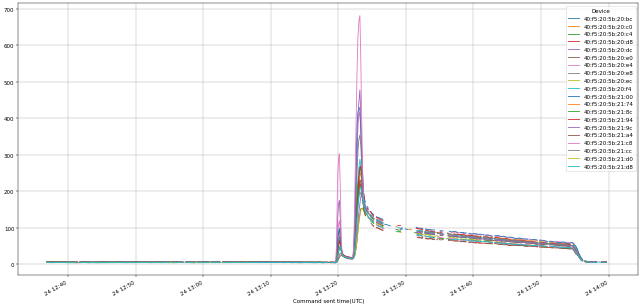

In [20]:
target_100ug_df.plot.line(figsize=(20,10), grid=True);

Plot 500 μg/m<sup>3</sup> target experiment phase data

Interactive plot:

In [21]:
#px.line(target_500ug_df)

Static plot:

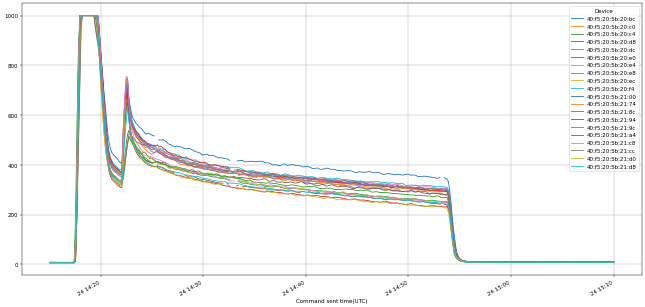

In [22]:
target_500ug_df.plot.line(figsize=(20,10), grid=True);

Plot 800 μg/m<sup>3</sup> target experiment phase data

Interactive plot:

In [23]:
#px.line(target_800ug_df)

Static plot:

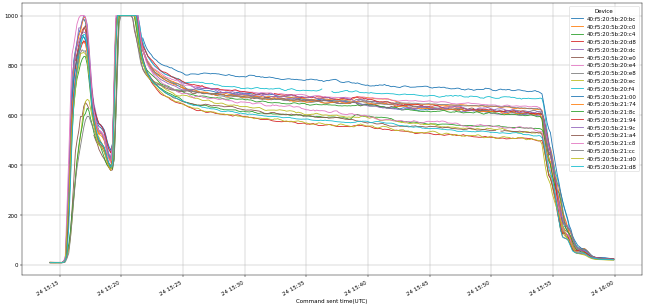

In [24]:
target_800ug_df.plot.line(figsize=(20,10), grid=True);

# Extract the steady state data of all phases of each experiment


## Extract baseline data from 100 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 12:30 to 12:49 UTC for baseline data and linearly interpolate for missed datapoints.

In [25]:
start = "2021-06-24 12:40"
end = "2021-06-24 12:59"
df = target_100ug_df

masked_baseline_df = df.loc[start:end].interpolate()

Interactive plot:

In [26]:
#px.line(masked_baseline_df)

Static plot:

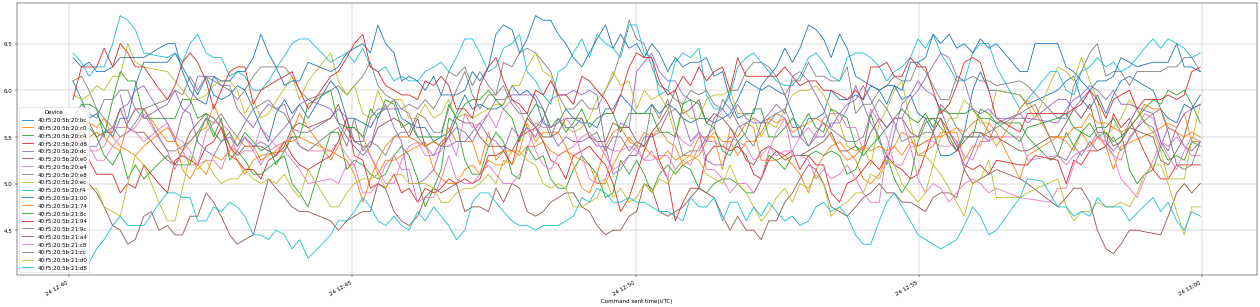

In [27]:
masked_baseline_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [28]:
print(f"{masked_baseline_df.shape[0]} timepoints extracted")

141 timepoints extracted


## Extract steady state data from 100 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 13:32 to 13:51 UTC for the 100 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [29]:
start = "2021-06-24 13:32"
end = "2021-06-24 13:51"
df = target_100ug_df

masked_target_100ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [30]:
#px.line(masked_target_100ug_df)

Static plot:

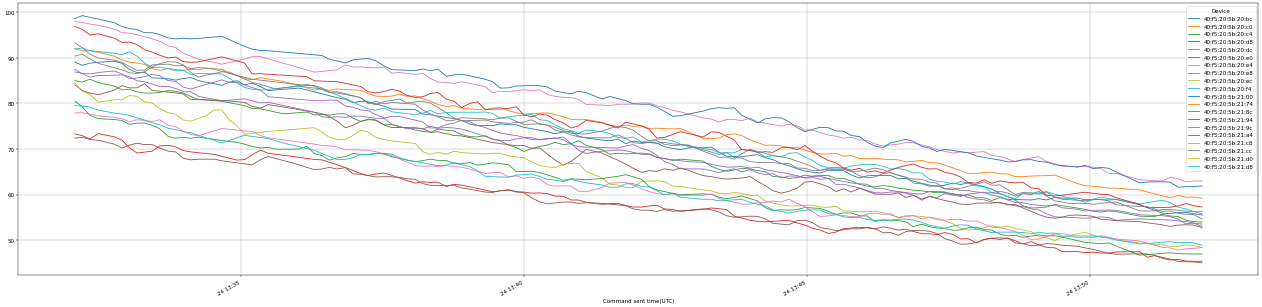

In [31]:
masked_target_100ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [32]:
print(f"{masked_target_100ug_df.shape[0]} timepoints extracted")

142 timepoints extracted


## Extract steady state data from 500 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 14:30 to 14:49 UTC for the 500 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [33]:
start = "2021-06-24 14:30"
end = "2021-06-24 14:49"
df = target_500ug_df

masked_target_500ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [34]:
#px.line(masked_target_500ug_df)

Static plot:

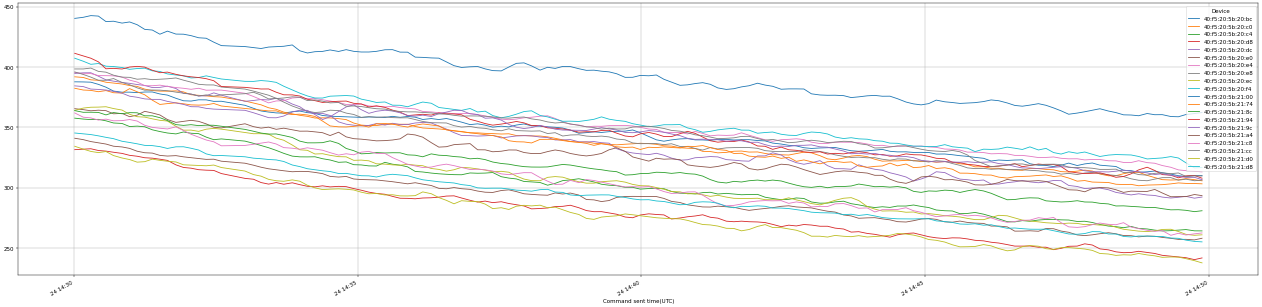

In [35]:
masked_target_500ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [36]:
print(f"{masked_target_500ug_df.shape[0]} timepoints extracted")

144 timepoints extracted


## Extract steady state data from 800 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 15:30 to 15:49 UTC for the 800 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [37]:
start = "2021-06-24 15:30"
end = "2021-06-24 15:49"
df = target_800ug_df

masked_target_800ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [38]:
#px.line(masked_target_800ug_df)

Static plot:

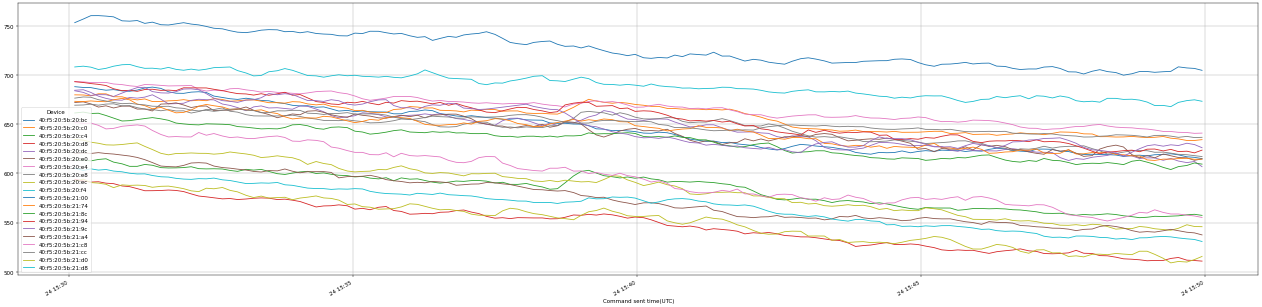

In [39]:
masked_target_800ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [40]:
print(f"{masked_target_800ug_df.shape[0]} timepoints extracted")

145 timepoints extracted


## Merge all steady state datasets 

We perform this in order to process the data over the entire measurement range supported by the SDS011 sensor

In [41]:
unnormalized_df = pd.concat([masked_baseline_df, masked_target_100ug_df, masked_target_500ug_df, masked_target_800ug_df])

In [42]:
unnormalized_df.head()

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
Command sent time(UTC),,,,,,,,,,,
2021-06-24 12:40:04,6.10,5.50,5.6,5.40,5.55,...,5.05,5.45,NaN,4.90,4.40
2021-06-24 12:40:13,5.90,5.45,5.5,5.15,5.45,...,5.05,5.45,5.85,4.90,4.30
2021-06-24 12:40:21,5.70,5.50,5.6,5.25,5.40,...,5.00,5.40,5.75,4.95,4.15
2021-06-24 12:40:29,5.75,5.55,5.5,5.10,5.40,...,4.90,5.25,5.70,4.95,4.30
2021-06-24 12:40:37,5.60,5.50,5.3,5.10,5.55,...,4.75,5.25,5.90,4.75,4.40


# Plot correlation heatmap of stable phase unnormalized data

In [43]:
correlation_mat=unnormalized_df.corr()
px.imshow(correlation_mat, x=list(correlation_mat.columns), y=list(correlation_mat.index), width=800, height=600)

# Obtain the device with the median measurement over the entire range

We accomplish this by calculating the area under the curve using the trapezoidal rule.

In [44]:
integrate_dict = {}
integrate_list = []

for device in unnormalized_df.columns:
  sample_points = unnormalized_df.index.to_series().diff().dt.total_seconds().fillna(0).cumsum().values
  measurements = unnormalized_df[device].values

  value = np.trapz(measurements, x=sample_points)
  integrate_dict[device] = value
  integrate_list.append(value)

median = np.median(np.array(integrate_list))

In [45]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [46]:
nearest_to_median = find_nearest(np.array(integrate_list), median)
median_device = ''

for device, int_value in integrate_dict.items():
    if int_value == nearest_to_median:
      median_device = device
      print(f"median value device == {device}")

median value device == 40:f5:20:5b:20:bc


# Data correction

Using Ordinary Least Squares as the regression method

In [47]:
y = unnormalized_df
x = unnormalized_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
coeffs = results.params
coeffs.columns = unnormalized_df.columns
coeffs.index = ['intercept', 'slope']
coeffs

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
intercept,5.684342e-14,-3.879389,-3.037746,-4.203001,-3.444830,...,-5.707446,-5.982580,0.361404,-5.645841,-3.606233
slope,1.000000e+00,1.018594,0.904999,0.849154,1.001147,...,0.891173,0.927803,1.009325,0.854746,0.879464


# Test data normalization using regression between the median device and sample devices 

Choose device index from 0 - 19

In [48]:
#Change the variable below from 0..19.
device_index = 15

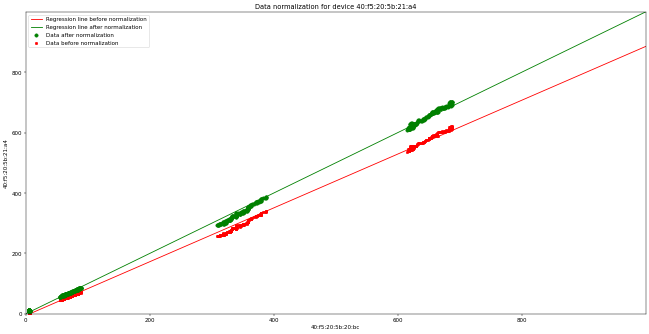

In [49]:
sensor_range_start = 0
sensor_range_end = 999.9

device = unnormalized_df.columns[device_index]
ax = unnormalized_df.plot.scatter(x=median_device, y= device, figsize=(20,10), color="r", label = "Data before normalization", title = f"Data normalization for device {device}", xlabel="Reference device");
ax.set_ylim(sensor_range_start, sensor_range_end)
ax.set_xlim(sensor_range_start, sensor_range_end)

#Original regression line on device data
slope = coeffs[device][1]
constant = coeffs[device][0]

dummy_median_data = np.linspace(sensor_range_start, sensor_range_end, 100)
ax.plot(dummy_median_data, slope*dummy_median_data + constant, "r", label="Regression line before normalization");

#Ideal correction curve
ax.plot([sensor_range_start, sensor_range_end], [sensor_range_start, sensor_range_end], "g", label="Regression line after normalization");


#Corrected measurements
slope = 1/coeffs[device][1]
constant = -coeffs[device][0]
ax.plot(unnormalized_df[median_device], slope*unnormalized_df[device] + constant, "go", label="Data after normalization");

plt.legend(loc="upper left");

# Correct entire dataset

In [50]:
corrected_baseline_df = masked_baseline_df.copy()
for device in masked_baseline_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_baseline_df[device] = slope*masked_baseline_df[device] + constant

In [51]:
corrected_100ug_df = masked_target_100ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_100ug_df[device] = slope*masked_target_100ug_df[device] + constant

In [52]:
corrected_500ug_df = masked_target_500ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_500ug_df[device] = slope*masked_target_500ug_df[device] + constant

In [53]:
corrected_800ug_df = masked_target_800ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_800ug_df[device] = slope*masked_target_800ug_df[device] + constant

# Plot side by side comparison per measurement phase

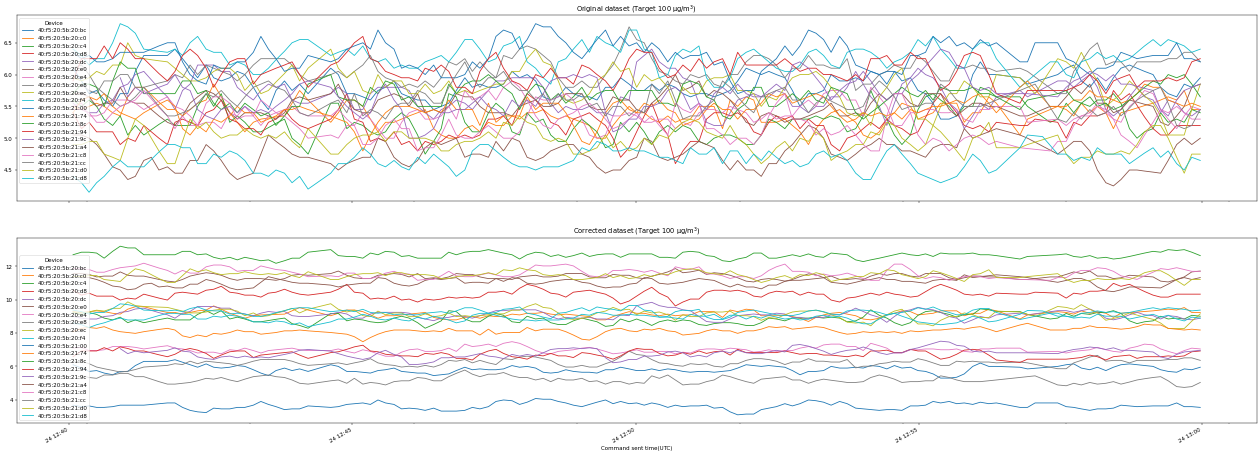

In [63]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_baseline_df.plot.line(ax=axarr[0], title = "Original dataset (Target 100 $\mathregular{μg/m^{3}}$)")
corrected_baseline_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 100 $\mathregular{μg/m^{3}}$)");

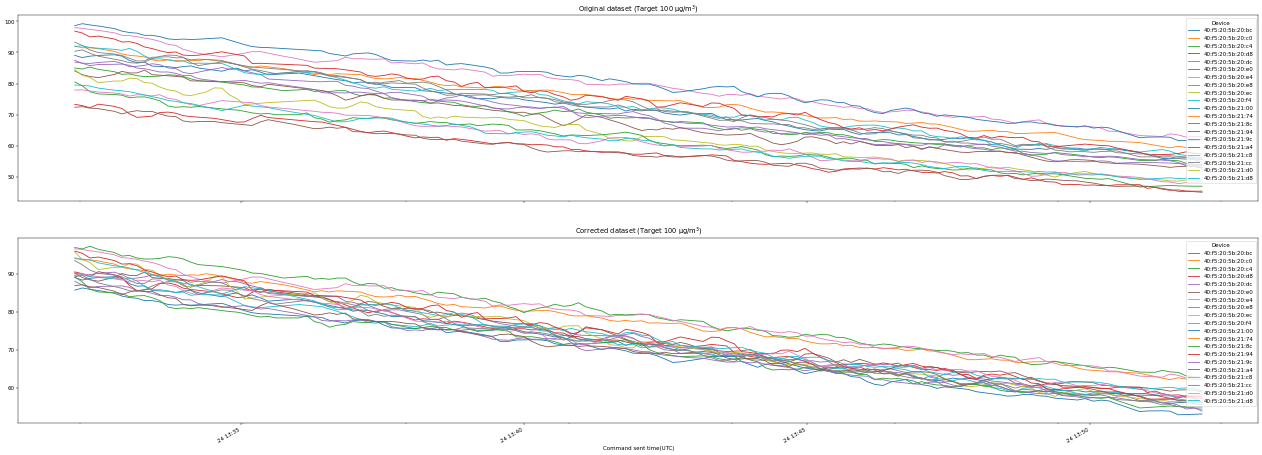

In [55]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_100ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 100 $\mathregular{μg/m^{3}}$)")
corrected_100ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 100 $\mathregular{μg/m^{3}}$)");

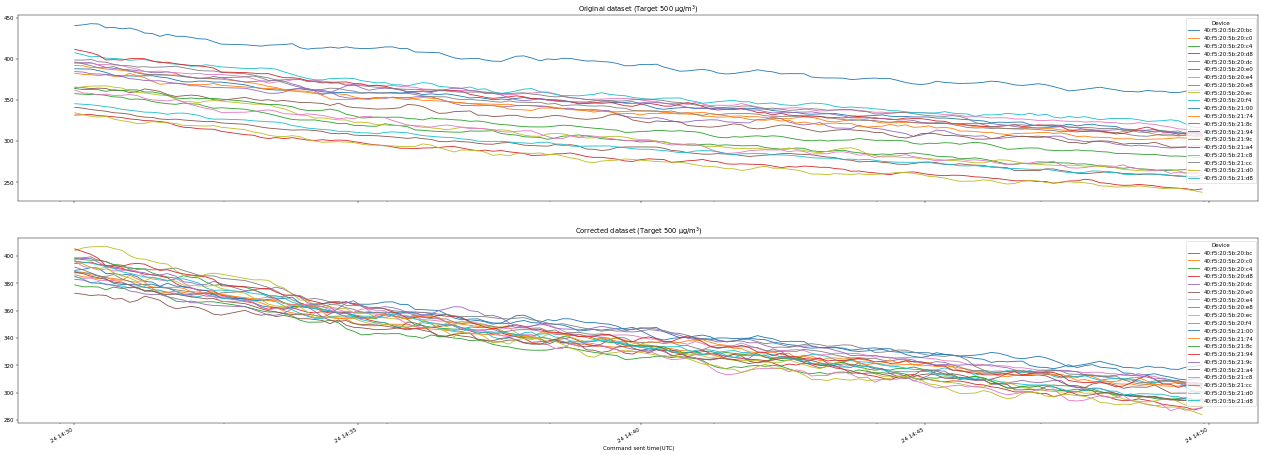

In [56]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_500ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 500 $\mathregular{μg/m^{3}}$)");
corrected_500ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 500 $\mathregular{μg/m^{3}}$)");

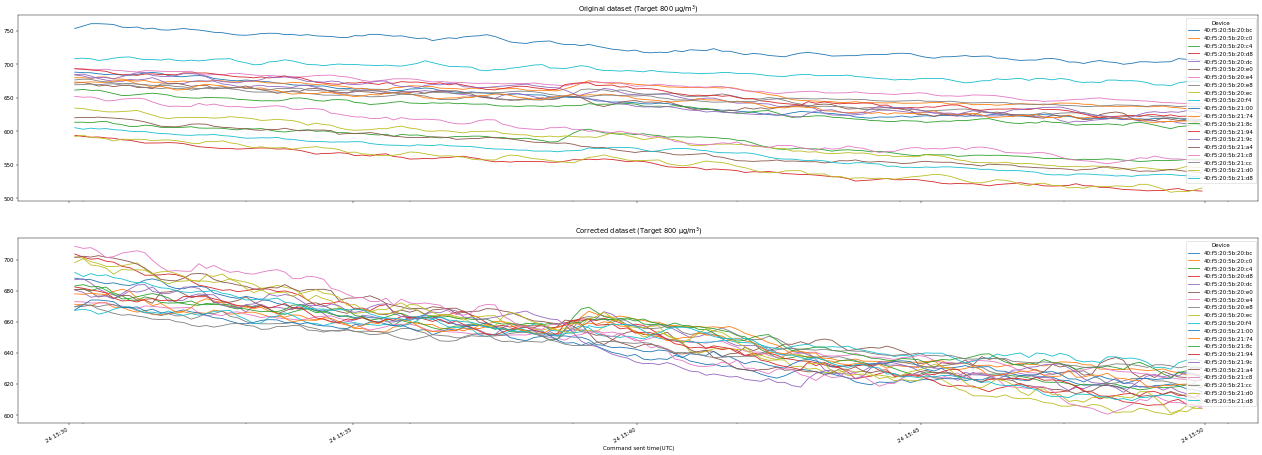

In [57]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_800ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 800 $\mathregular{μg/m^{3}}$)");
corrected_800ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 800 $\mathregular{μg/m^{3}}$)");

# Finalize analysis of normalized data

In [58]:
normalized_df = pd.concat([corrected_baseline_df, corrected_100ug_df, corrected_500ug_df, corrected_800ug_df])

In [59]:
normalized_df.head()

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
Command sent time(UTC),,,,,,,,,,,
2021-06-24 12:40:04,6.10,9.278988,9.225599,10.562275,8.988472,...,11.374134,11.856674,NaN,11.378535,8.609283
2021-06-24 12:40:13,5.90,9.229901,9.115102,10.267864,8.888587,...,11.374134,11.856674,5.434548,11.378535,8.495577
2021-06-24 12:40:21,5.70,9.278988,9.225599,10.385629,8.838644,...,11.318028,11.802783,5.335472,11.437032,8.325019
2021-06-24 12:40:29,5.75,9.328076,9.115102,10.208982,8.838644,...,11.205817,11.641111,5.285933,11.437032,8.495577
2021-06-24 12:40:37,5.60,9.278988,8.894107,10.208982,8.988472,...,11.037499,11.641111,5.484086,11.203044,8.609283


# Apply regression between median device data and normalized data of all devices

In [60]:
y = normalized_df
x = unnormalized_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
corrected_coeffs = results.params
corrected_coeffs.columns = normalized_df.columns
corrected_coeffs.index = ['intercept', 'slope']
corrected_coeffs

Device,40:f5:20:5b:20:bc,40:f5:20:5b:20:c0,40:f5:20:5b:20:c4,40:f5:20:5b:20:d8,40:f5:20:5b:20:dc,...,40:f5:20:5b:21:a4,40:f5:20:5b:21:c8,40:f5:20:5b:21:cc,40:f5:20:5b:21:d0,40:f5:20:5b:21:d8
intercept,0.0,0.070817,-0.318884,-0.746635,0.003946,...,-0.696973,-0.465537,-0.003339,-0.959441,-0.494259
slope,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


# Save correction factors to disk

In [61]:
correction_factors = coeffs.copy()

correction_factors.loc["intercept"] = -coeffs.loc["intercept"]
correction_factors.loc["slope"] = 1/coeffs.loc["slope"]

In [62]:
results_folder = "results"

if os.path.isdir(results_folder) == False:
  os.mkdir(results_folder)

correction_factors.to_csv(f"{results_folder}/correction_factors.csv", encoding="utf8")